# Logistic Function
The logistic function, also called the sigmoid function. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

1 / (1 + e^-value)

Where e is the base of the natural logarithms (Euler’s number or the EXP() function in your spreadsheet) and value is the actual numerical value that you want to transform

ref : https://machinelearningmastery.com/logistic-regression-for-machine-learning/

In [47]:
import numpy as np
n_samples = 500
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)

print(X[0:5])
print(y[0:5])
print(X[5:10])
print(y[5:10])

[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]
[1. 1. 1. 1. 1.]
[-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
[0. 1. 0. 0. 1.]


In [48]:
print("\n Min {}, Max{}".format(min(X), max(X)))


 Min -2.77259275642665, Max2.6962240525635797


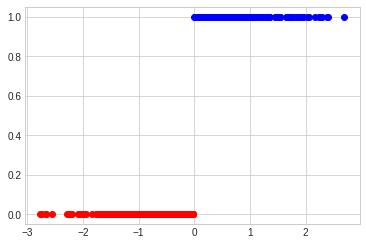

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
x1_filt = []
y1_filt = []

x2_filt = []
y2_filt = []

for cx,cy in zip(X,y):
  if (cy ==0):
    x1_filt.append(cx)
    y1_filt.append(cy)
  else:
    x2_filt.append(cx)
    y2_filt.append(cy)
plt.plot(x1_filt, y1_filt, 'o', color='red');
plt.plot(x2_filt, y2_filt, 'o', color='blue');

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).

In [50]:
# Fit the classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = X.reshape(-1,1)
logRegX_train, logRegX_test, logRegy_train, logRegy_test = train_test_split(X, y, test_size=0.2, random_state=0)

lreg = LogisticRegression()
lreg.fit(logRegX_train, logRegy_train)
logRegy_pred = lreg.predict(logRegX_test)
print('Accuracy {:.2f}'.format(lreg.score(logRegX_test, logRegy_test)))

#print('{}-{}'.format(X_test[0:10],y_pred[0:10]))

Accuracy 1.00


In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
print('Accuracy {:.2f}'.format(gnb.score(X_test, y_test)))

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes (in %):", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy 0.97
Gaussian Naive Bayes (in %): 96.66666666666667



 Min -2.43670919062986, Max2.7868035924262387


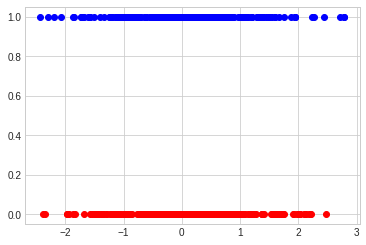

In [51]:
n_samples = 500
half = (int)(n_samples/2)
np.random.seed(4)
X = np.random.normal(size=n_samples)
y = [n_samples]
y[:half] = [0]*half
y[half+1:] = [1]*half

#print(X[0:10])
#print(y[0:10])
print("\n Min {}, Max{}".format(min(X), max(X)))
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(X[:half], y[:half], 'o', color='red');
plt.plot(X[half+1:], y[half+1:], 'o', color='blue');

In [53]:
# Fit the classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lreg = LogisticRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
print('Accuracy {:.2f}'.format(lreg.score(X_test, y_test)))


Accuracy 0.49


In [58]:
# load the iris dataset
from sklearn.datasets import load_iris
from sklearn import metrics
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


In [59]:
X = iris.data
y = iris.target
print(len(X))

print(df.head())

title = df.columns.values

150
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

#reason for solver = lbfgs
#https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

lreg = LogisticRegression(solver='lbfgs', max_iter=125)
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
print('Accuracy {:.2f}'.format(lreg.score(X_test, y_test)))

Accuracy 0.97


In [72]:
print(title[0] + " and " + title[1])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], y, test_size=0.4, random_state=1)
  
lreg = LogisticRegression(solver='lbfgs', max_iter=125)
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
print('Accuracy {:.2f}'.format(lreg.score(X_test, y_test)))

sepal length (cm) and sepal width (cm)
Accuracy 0.77


In [73]:
print(title[2] + " and " + title[3])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,2:], y, test_size=0.4, random_state=1)

  
lreg = LogisticRegression(solver='lbfgs', max_iter=125)
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
print('Accuracy {:.2f}'.format(lreg.score(X_test, y_test)))

petal length (cm) and petal width (cm)
Accuracy 0.97
